In [1]:
from mb_rag.basic import ModelFactory

In [2]:
llm = ModelFactory(model_name="gemini-3-pro-preview",model_type='google')
# llm.invoke_query('What is the capital of France?')

In [3]:
from mb_rag.agents.get_langsmith import set_langsmith_parameters
import os
from dotenv import load_dotenv
load_dotenv()
set_langsmith_parameters(langsmith_endpoint="https://api.smith.langchain.com",
                        langsmith_project="BB-Labeling-Agent-Project",
                        langsmith_tracing="true")
os.environ["LANGCHAIN_TRACING_V2"] = "true"


In [4]:
from mb_rag.agents.bb_autolabel import create_labeling_agent,LabelingGraph

/home/malav/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
agent = create_labeling_agent(llm.model,logging=False,langsmith_params=True)

In [6]:
graph_agent = LabelingGraph(agent)

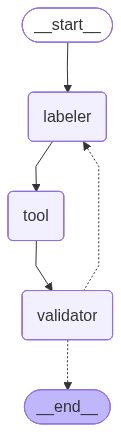

In [7]:
from IPython.display import Image, display
display(Image(graph_agent._build_graph().get_graph(xray=True).draw_mermaid_png()))

/home/malav/.local/lib/python3.11/site-packages/pydantic/v1/main.py:1048: UserWarning: LangSmith now uses UUID v7 for run and trace identifiers. This warning appears when passing custom IDs. Please use: from langsmith import uuid7
            id = uuid7()
Future versions will require UUID v7.
  input_data = validator(cls_, input_data)


respone from LLM : content=[{'type': 'text', 'text': '```json\n{\n  "labeled_objects": [\n    {\n      "label": "scambled eggs",\n      "box": [\n        0.180,\n        0.345,\n        0.770,\n        0.650\n      ],\n      "valid": false\n    },\n    {\n      "label": "spoon",\n      "box": [\n        0.469,\n        0.814,\n        0.735,\n        0.995\n      ],\n      "valid": false\n    }\n  ]\n}\n```', 'extras': {'signature': 'EvMTCvATAdHtim/EpdFps5HQ0df9AMeN9Ckg/jkRqDc6sTCrtp+Q7jzf+Szam+PKqecmxZxDyg1Pb8DYO5RUn+OkF/ku7RVGhl9M0HWOOta0+Uyrlwh8pCoCaXY32qcqkLnvLhIWgDb+cuClp0mGFcv62wFmjlUwcwQWiy1FEoGFTUF6TbA8Z9Satw+1x/0tES3I587rH0bGVKn8IvBIDezr6a1xtolDJPw7s1ixridTh93HU1dnuEMlCVBOHWxt1zA42cMOEDWujfmFKi2b4BMj3IMy4SgHavnA9CaLWzC/BnrTS1K7WaGaNMcdAkTka44UBEJwKlyOjqrafiH6c6G2T13qraEOBCVnIY41g3y2HLMtq6IGH7z9Ht8MmkcSdN7OTsG9JT0PB+RMDjXQCIVGoSlWljqxEKl2MZrmuQjGO3Bq06E1yRWtdwKBAkbtpm+jNV9X6PmUnfPJCgo/Vu5S495rH39S3Up/5IKaLxw+4mYnL98JnxwBU35KbOGVs2PNeub3R9FlPCPgiMMHUMWMVscN52JrVlfFl+GH8ruOaYzdIg

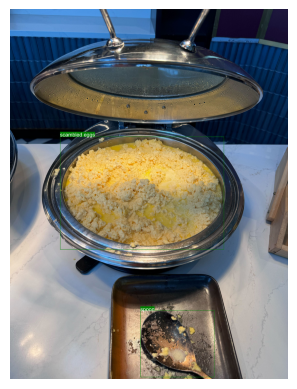

respone from LLM : content=[{'type': 'text', 'text': '```json\n{\n  "valid": true,\n  "failed_labels": []\n}\n```', 'extras': {'signature': 'EssQCsgQAdHtim/LTjWxovQb6+TWxGnUlwxHRuu0FoB1i0tTuWZLyOlAoa6Wq2m/B76zEbeh26p4HUMlPPOGm8KKt3AtS/pepwulEKmq1AoWF155yhIZ2lb0FKtKWRxhTvoukUALoph4DlRCO25xoM6ODmZouRPpOPy9u7eoQ88JiBsZ5dzvvOD5WhHtW2VH5WSlMllmyArPRHCdWy1Sf1UFtlToQx/PCgo/WGn/FvKgQsYuF8Gn5E/rG3W8SqqOT2eZfkEnvNybWzYsCOlyrhOgD6oHOv7WajoMmuM5feshePheOoiYOMX1mMAqhAuj0hna8y/zRZi5MhO27QgBMt+/OOOGn2G4NRwr1mU46bM1a3cNK/QS42mwcm7vbiMPRVvWa0AZplUqADQeHMelFtdNm+sQz8H7zTcJHpvPjH3jGGFUkQWR62UPlg8Tvq/uRLkwoLrxOtZjVIYiknzV5dafLJQHOvTYc46xtDU6Tj5V9CWiugzCwRb5f4BCZT5l9Qg5rSa3Lr5hOcmxRT9iQ4/w1JIenBXCzEQ33v0vqbfWtCunEWS18cdvMj8bDVgMtQvrPzSUb5/OW7I7yRaRfvL9mQ7W9XyqICd+Ir7lmEI3AEsvoqsxffH/fMBsqeX6Sk7Xh0m1Tawdnc8PrQoynS8dx/N78HOqOhykXS8ornCqTsciivUSpSf8F62BMpgQXibdy9lr1Qah3eFllj9qdXzgFA0VKMwqCAENZjQIfnn74t2rOjyBRzCyd6EOuVKnXW1hMy/4cuhijF/nWf4kS2NrTlOIcaO2GE4EaLKkTxhapyIl55iz9QOCgzBSqg2tXEjj5m3WKgQ1De2YlIMrKjDrY7I

{'messages': [{'role': 'agent',
   'content': '{\n  "labeled_objects": [\n    {\n      "label": "scambled eggs",\n      "box": [\n        0.180,\n        0.345,\n        0.770,\n        0.650\n      ],\n      "valid": false\n    },\n    {\n      "label": "spoon",\n      "box": [\n        0.469,\n        0.814,\n        0.735,\n        0.995\n      ],\n      "valid": false\n    }\n  ]\n}'}],
 'boxes_json': '{\n  "labeled_objects": [\n    {\n      "label": "scambled eggs",\n      "box": [\n        0.180,\n        0.345,\n        0.770,\n        0.650\n      ],\n      "valid": false\n    },\n    {\n      "label": "spoon",\n      "box": [\n        0.469,\n        0.814,\n        0.735,\n        0.995\n      ],\n      "valid": false\n    }\n  ]\n}',
 'labeled_objects': [{'label': 'scambled eggs',
   'box': [0.18, 0.345, 0.77, 0.65],
   'valid': False},
  {'label': 'spoon', 'box': [0.469, 0.814, 0.735, 0.995], 'valid': False}],
 'temp_bb_img_path': './data/temp_bb_image.jpg',
 'valid': True,

In [8]:
graph_agent.run(image_path='./data/IMG_1827.jpg', query="Label the spoon and scambled eggs in the image.")

In [9]:
# from mb_rag.basic import ModelFactory
# import os
# from dotenv import load_dotenv
# load_dotenv()

In [10]:
# llm = ModelFactory(model_name='gemini-3-pro-preview',model_type='google')

In [11]:
# k =llm.invoke_query('how to use thinking level in gemini 3 with langchain?')

In [12]:
# k[0]['text']